In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import datasete
df = pd.read_csv(r'C:\Users\iahma\OneDrive\Desktop\diamonds.csv')

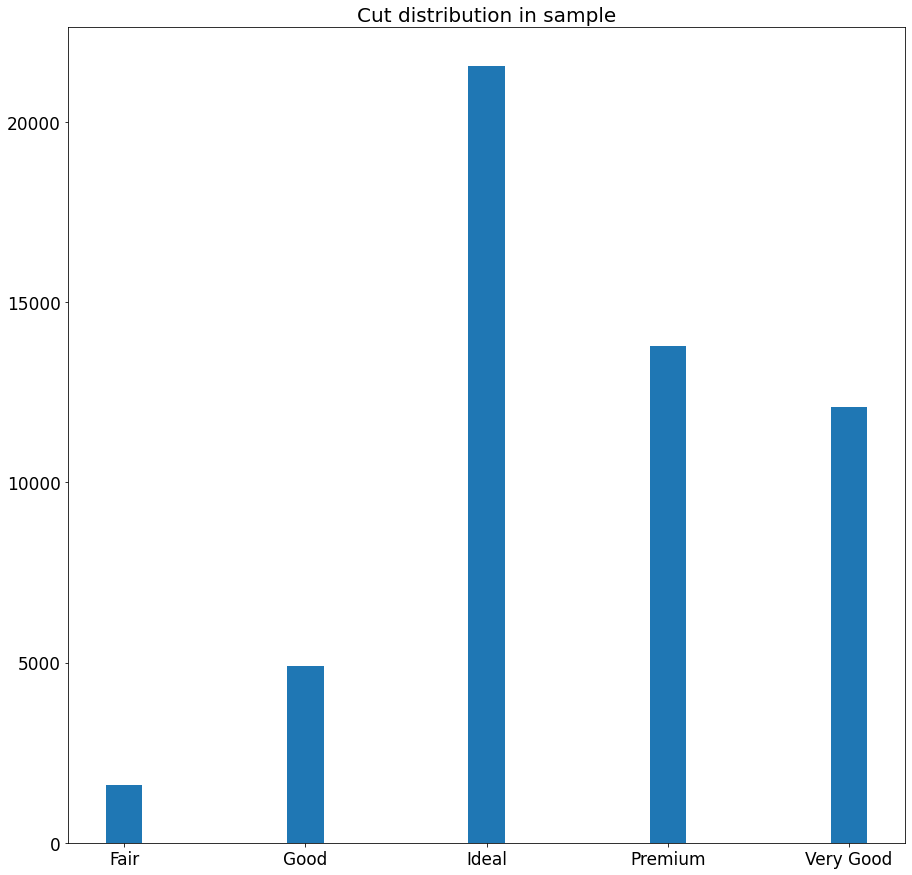

In [16]:
# Cuts distribution in the sample
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
x = np.arange(5)
xlabel = ['Fair','Good','Ideal','Premium','Very Good']
 
width = 0.2

Group = df.groupby(['cut'])['cut'].count()
ax.bar(x, Group, width)
plt.xticks(x, xlabel, fontsize=17) 
plt.yticks(fontsize=17)
plt.title('Cut distribution in sample', fontsize=20)
fig.savefig(r'C:\Users\iahma\OneDrive\Desktop\snips\1.PNG')


In [18]:
# After initial model assessment i found that the variables effect on the cut category
# "Premium" were statisticlly insignificant so it was dropped for simplification 
df.dtypes
filter_col = df[ df['cut'] == 'Premium' ].index
df.drop(filter_col, inplace=True)
df.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [19]:
# The original sample is heavily biased towards the "ideal-very good" cut
# so i balanced the sample
df_fair = df[df['cut'] == 'Fair'] 
df_good = df[df['cut'] == 'Good']
df_ideal = df[df['cut'] == 'Ideal'].sample(frac=.23)
df_Very_Good = df[df['cut'] == 'Very Good'].sample(frac=.40)
df_balanced = pd.concat([df_fair,df_good,df_ideal,df_Very_Good])

In [58]:
# We need to define the 'cut' variable as a catagoical one
cat_type = CategoricalDtype(categories = ['Fair','Good','Ideal','Very Good'],ordered = True)

In [59]:
df_balanced["cut"] = df_balanced["cut"].astype(cat_type)

In [60]:
df_balanced["cut"].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good'], ordered=True)

In [20]:
# We can calculate the volume of the diamond as a cube for simplification
df_balanced['volume'] = df_balanced['x']* df_balanced['y']* df_balanced['z']

In [21]:
df_balanced.drop(['x','y','z'],axis=1,inplace=True)

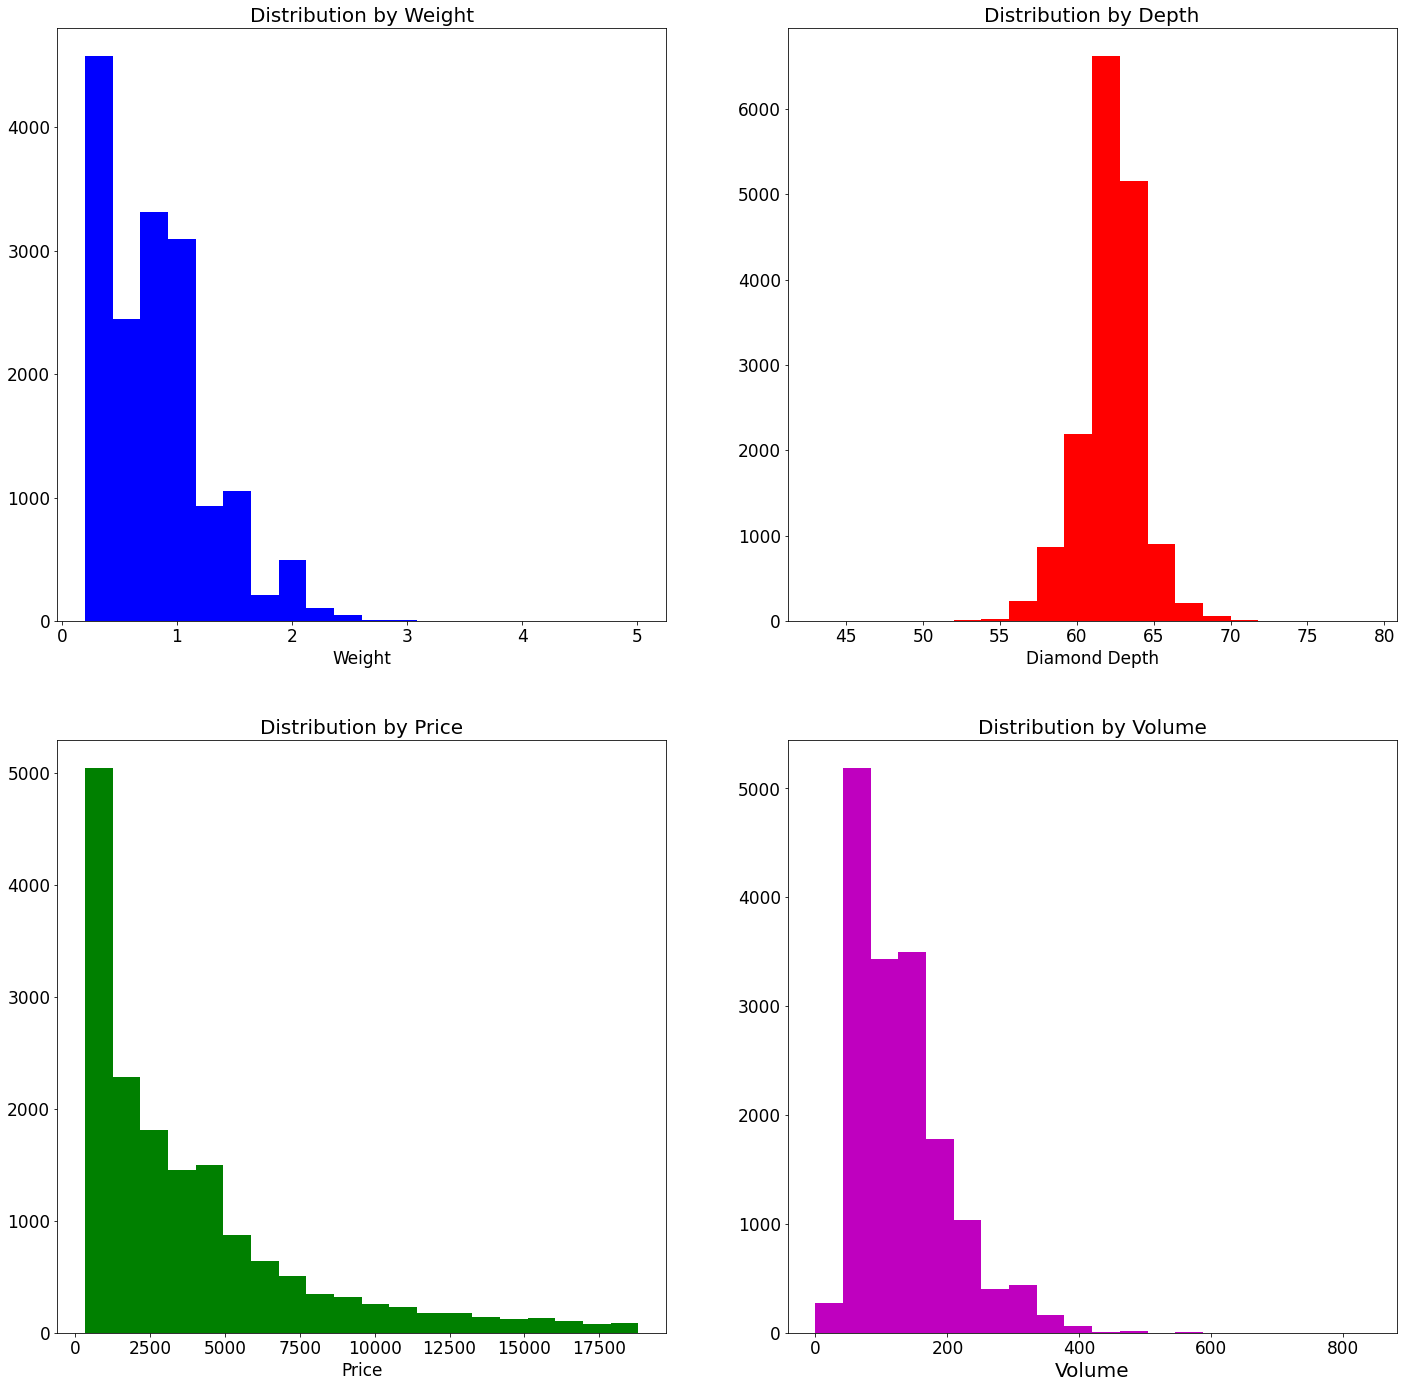

In [31]:
# Checking the distribution of the sample
plt.figure(figsize=[24,24])
plt.subplot(221)
plt.hist(df_balanced['carat'],bins=20,color='b')
plt.xlabel('Weight', fontsize=17)
plt.title('Distribution by Weight', fontsize=20)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)

plt.subplot(222)
plt.hist(df_balanced['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth', fontsize=17)
plt.title('Distribution by Depth', fontsize=20)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)

plt.subplot(223)
plt.hist(df_balanced['price'],bins=20,color='g')
plt.xlabel('Price', fontsize=17)
plt.title('Distribution by Price', fontsize=20)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)

plt.subplot(224)
plt.hist(df_balanced['volume'],bins=20,color='m')
plt.xlabel('Volume', fontsize=20)
plt.title('Distribution by Volume', fontsize=20)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)

plt.savefig(r'C:\Users\iahma\OneDrive\Desktop\snips\2.PNG')

In [64]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [66]:
# We create an orderd logistical model and we fit it using the Nelder-Mead method
mod_prob = OrderedModel(df_balanced['cut'],df_balanced[['volume','price','carat']],distr='logit')
res_prob = mod_prob.fit(method= 'nm')
res_prob.summary()

C:\Users\iahma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
C:\Users\iahma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -20367.
Model:                   OrderedModel   AIC:                         4.075e+04
Method:            Maximum Likelihood   BIC:                         4.079e+04
Date:                Fri, 23 Feb 2024                                         
Time:                        17:21:50                                         
No. Observations:               16306                                         
Df Residuals:                   16300                                         
Df Model:                           3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
volume              0.1409      0.005     30.181      0.000       0.132       0.150
price               0.0002   1.03e-05     19.659      0.000       0.000       0.000
carat             -24.4706      0.736    -33.229      0.000     -25.914     -23.027
Fair/Good          -2.8895      0.048    -59.885      0.000      -2.984      -2.795
Good/Ideal          0.6694      0.014     46.500      0.000       0.641       0.698
Ideal/Very Good     0.3359      0.013     25.331      0.000       0.310       0.362
===================================================================================
"""

In [67]:
# We can find the probabilty of each cut's quality for each record
predicted = res_prob.model.predict(res_prob.params, exog=df_balanced[['volume', 'price', 'carat']])

In [68]:
# Adding threshold values will allow us to evaluate the accuraccy of the model's classification 
num_of_thresholds = 3
mod_prob.transform_threshold_params(res_prob.params[-num_of_thresholds:])

array([       -inf, -2.88950284, -0.93650684,  0.46274343,         inf])

In [69]:
predicted

array([[0.06268208, 0.25771428, 0.33600526, 0.34359837],
       [0.06619452, 0.26702166, 0.33620667, 0.33057715],
       [0.20686567, 0.44086365, 0.23393889, 0.1183318 ],
       ...,
       [0.06009269, 0.25059698, 0.33550484, 0.35380549],
       [0.07269686, 0.28325308, 0.33536286, 0.30868721],
       [0.11001564, 0.35564217, 0.31365476, 0.22068743]])

In [70]:
# We then evaluate the latent variable and classify the records based on the
# thresholds we previously obtained

import math
df_balanced["Predictor"] = 0
df_balanced["Predictor"] = 0.1409*df_balanced["volume"]+0.0002*df_balanced["price"]-24.4706*df_balanced["carat"]
df_balanced["Predicted_cut"] = ""

df_balanced.loc[df_balanced['Predictor'] <= -2.88950284, 'Predicted_cut'] = 'Fair'
df_balanced.loc[(df_balanced['Predictor'] >= -2.88950284) & (df_balanced['Predictor'] < -0.93650684) , 'Predicted_cut'] = 'Fair/Good'
df_balanced.loc[(df_balanced['Predictor'] >= -0.93650684) & (df_balanced['Predictor'] < 0.46274343) , 'Predicted_cut'] = 'Good/Ideal'
df_balanced.loc[df_balanced['Predictor'] >= 0.46274343 , 'Predicted_cut'] = 'Ideal/Very Good'


In [72]:
# Creating a crosstab between the actual cut and the predicted cut
# we can examin the presesion of the model
pd.crosstab(df_balanced.cut,df_balanced.Predicted_cut)

Predicted_cut,Fair,Fair/Good,Good/Ideal,Ideal/Very Good
cut,,,,
Fair,160,909,523,18
Good,38,1585,3217,66
Ideal,3,144,4556,254
Very Good,13,686,3981,153
